In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../')
from cross_match import *

In [61]:
g2 = pd.read_hdf('/data/jls/GaiaDR2/spectro/RAVE_input.hdf5')

In [62]:
gt = g2[g2.source_id<0.].reset_index()

In [63]:
len(gt), len(g2)

(1914, 457555)

In [75]:
def grab_background(ra, dec,epoch):
    return pd.DataFrame.from_dict(
                sqlutil.get(
                    'select g.* from gaia_dr2.gaia_source as g where '+
                    'q3c_radial_query(g.ra, g.dec, %0.9f, %0.9f, 50./3600.) and '
                    'q3c_join_pm(g.ra, g.dec, g.pmra, g.pmdec, g.ref_epoch, %0.9f, %0.9f, g.ref_epoch-%0.5f,%0.5f, 5/3600.)'
                    'order by q3c_dist_pm(g.ra, g.dec, g.pmra, g.pmdec, g.ref_epoch, %0.9f, %0.9f, g.ref_epoch-%0.5f) limit 1'\
                        %(ra,dec,ra,dec,epoch, epoch,ra,dec,epoch),
                               host='cappc127',
                              user='jason_sanders',
                              password=wsdbpassword,
                              preamb='set enable_seqscan to off; ' +
                              'set enable_mergejoin to off; ' +
                              'set enable_hashjoin to off;',
                              asDict=True,
                              strLength=35))

In [76]:
from astropy.coordinates import SkyCoord
import astropy.units as u
c = SkyCoord(gt.ra*u.deg,gt.dec*u.deg)
gt = gt[np.abs(c.galactic.b)>30.*u.deg].reset_index(drop=True)

(7.16988, 6.066, 5.604, 0.098283)

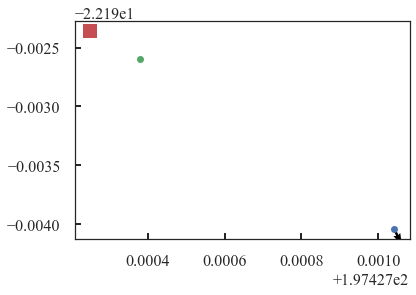

In [85]:
xx = 5
g = grab_background(gt['ra'][xx],gt['dec'][xx], 15.)
plt.plot(g['ra'],g['dec'],'.')
plt.quiver(g['ra'],g['dec'],g['pmra'],g['pmdec'])
plt.plot(g['ra']-g['pmra']*15./3600000.,g['dec']-g['pmdec']*15./3600000.,'.')
plt.plot(gt['ra'][xx],gt['dec'][xx],'s',zorder=-1)
g['phot_g_mean_mag'][0], gt['J'][xx], gt['K'][xx], g['ebv'][0]

In [41]:
g['phot_g_mean_mag'], g['pmra'], gt['J'][2119], gt['K'][2119]

(0    19.8757
 Name: phot_g_mean_mag, dtype: float32, 0    2.747044
 Name: pmra, dtype: float64, 15.718, 14.857)

In [128]:
gnon = gt[g2_g.parallax!=g2_g.parallax]

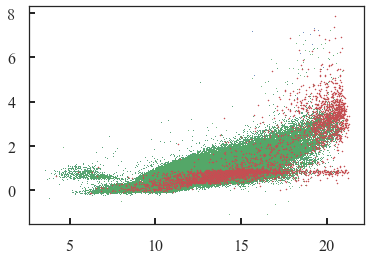

In [161]:
from matplotlib.colors import LogNorm
# plt.hist2d(g2.G,g2.J-g2.K,range=[[-1.,14.],[-1.,7.]],bins=100,norm=LogNorm())
plt.plot(g2.G,g2.J-g2.K,'.',ms=2)
plt.plot(g2_g.phot_g_mean_mag,g2_g.j_m-g2_g.k_m,'.',ms=2)
plt.plot(gnon.G,gnon.J-gnon.K,'.',ms=3)

In [162]:
np.count_nonzero(np.abs(g2_g.k_m-gt.K)>1e-3)

49

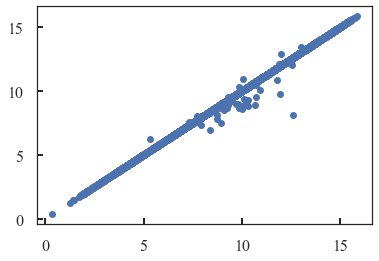

In [103]:
plt.plot(g2_g.k_m,gt.K,'.')

In [104]:
gt_2 = g2[g2.source_id<0.].reset_index()

(array([  2.,   7.,  34.,  78., 218., 390., 548., 579.,  29.,   0.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

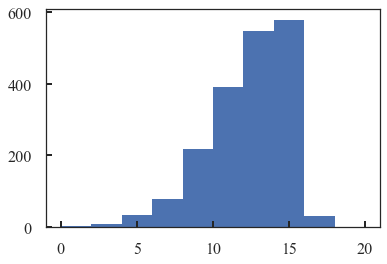

In [155]:
plt.hist(gt_2.J,range=[0.,20.])

In [86]:
len(gg)

3193

In [109]:
g2_t = crossmatch_2mass_ids_gaia_version2(gt_2, dist_max=40.)


        select tt.* from mytable as m left join lateral
        (select * from gaia_dr2_aux.gaia_source_2mass_xm as s where q3c_join(m.ra,m.dec,s.ra,s.dec,0.01111111)
        and abs(s.j_m-m.j)<1e-3
        order by q3c_dist(m.ra,m.dec,s.ra,s.dec)  asc limit 1)
        as tt on true order by xid


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

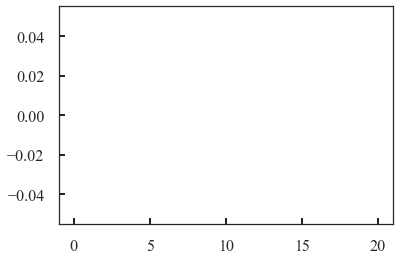

In [123]:
plt.hist(gt_2.G,range=[0.,20.])

In [ ]:
g2_t.

In [111]:
np.count_nonzero(g2_t.source_id>0.)

386

In [70]:
g = pd.concat([g2[['APOGEE_ID']].reset_index(),g2_t],axis=1)

np.count_nonzero(g2_t.source_id!=g2['source_id'])

g3 = g.merge(g2,on='APOGEE_ID')
g3 = g3[(g2_t.source_id!=g2['source_id'])]

In [73]:
g3.designation.values[0]

'Gaia DR2 695286730559307136'

In [75]:
g3.t_designation.values[0]

'09235450+2753539 '

In [80]:
g2.columns

Index([u'APOGEE_ID', u'J', u'H', u'K', u'eJ', u'eH', u'eK', u'ra', u'dec',
       u'ASPCAPFLAG', u'hrv', u'e_hrv', u'snr', u'AK', u'lnAK', u'teff',
       u'e_teff', u'TEFF_FLAG', u'logg', u'e_logg', u'LOGG_FLAG', u'fe_h',
       u'e_fe_h', u'M_H_FLAG', u'ALPHA_M', u'ALPHA_M_ERR', u'ALPHA_M_FLAG',
       u'C_M', u'C_M_ERR', u'C_M_FLAG', u'N_M', u'N_M_ERR', u'N_M_FLAG',
       u'rho_TZ', u'rho_gZ', u'rho_Tg', u'C_H', u'C_H_ERR', u'N_H', u'N_H_ERR',
       u'O_H', u'O_H_ERR', u'Mg_H', u'Mg_H_ERR', u'Al_H', u'Al_H_ERR', u'Si_H',
       u'Si_H_ERR', u'Ca_H', u'Ca_H_ERR', u'Fe_H', u'Fe_H_ERR', u'Ni_H',
       u'Ni_H_ERR', u'S_H', u'S_H_ERR', u'C_H_FLAG', u'N_H_FLAG', u'O_H_FLAG',
       u'Mg_H_FLAG', u'Al_H_FLAG', u'Si_H_FLAG', u'Ca_H_FLAG', u'Fe_H_FLAG',
       u'Ni_H_FLAG', u'S_H_FLAG', u'C_N', u'C_N_ERR', u'ID_2MASS', u'mag_use',
       u'mass', u'mass_error', u'source_id', u'parallax', u'parallax_error',
       u'pmra', u'pmra_error', u'pmdec', u'pmdec_error', u'parallax_pmra_corr',
   

In [78]:
print g3.ra_y.values[0]
print g3.ra_x.values[0]

140.977121
140.97708110409


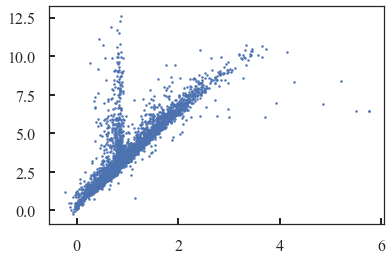

In [79]:
# plt.plot(g2.J-g2.K,g2.G-g2.H,'.',ms=5)
# plt.plot(g2_t.j_m-g2_t.k_m,g2_t.phot_g_mean_mag-g2_t.h_m,'.',ms=3)
plt.plot(g3.j_m-g3.k_m,g3.G-g3.h_m,'.',ms=5)
# plt.plot(g3.j_m-g3.k_m,g3.phot_g_mean_mag-g3.h_m,'.',ms=3)

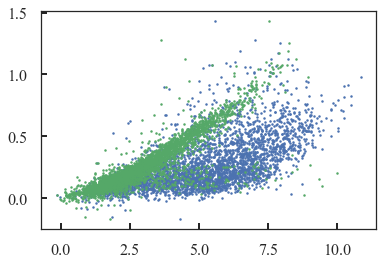

In [51]:
plt.plot(g3.phot_g_mean_mag-g3.j_m,g3.h_m-g3.k_m,'.',ms=5)
plt.plot(g3.G-g3.j_m,g3.h_m-g3.k_m,'.',ms=5)

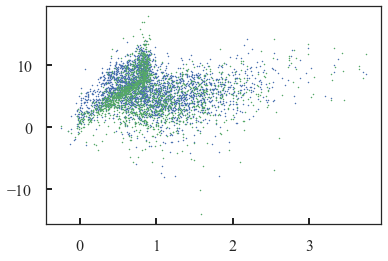

In [57]:
plt.plot(g3.j_m-g3.k_m,g3.phot_g_mean_mag-5.*np.log10(100./g3.parallax_y),'.',ms=3)
plt.plot(g3.j_m-g3.k_m,g3.G-5.*np.log10(100./g3.parallax_x),'.',ms=3)

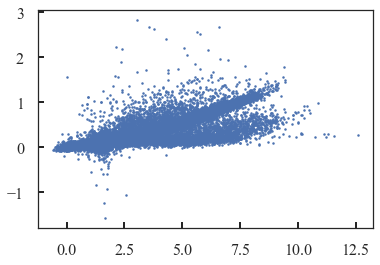

In [42]:
plt.plot(g.phot_g_mean_mag-g.j_m,g.h_m-g.k_m,'.',ms=5)

In [14]:
len(g)

5487

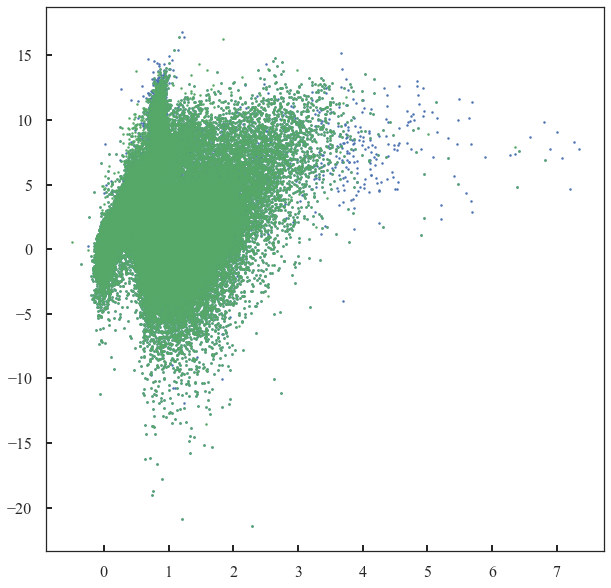

In [48]:
plt.figure(figsize=[10.,10.])
plt.plot(g2.J-g2.K,g2.G-5.*np.log10(100./g2.parallax),'.',ms=5)
plt.plot(g.j_m-g.k_m,g.phot_g_mean_mag-5.*np.log10(100./g.parallax),'.',ms=5)


[]

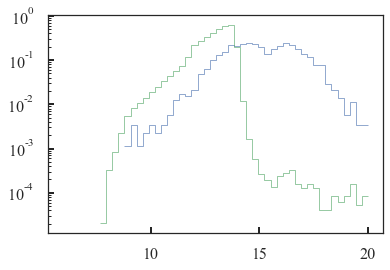

In [22]:
plt.hist(g.phot_g_mean_mag,range=[6.,20.],bins=50,histtype='step',normed=True);
plt.hist(g2.G,range=[6.,20.],bins=50,histtype='step',normed=True);
plt.semilogy()